In [1]:
import numpy as np 
from numpy.linalg import norm as norm
import matplotlib.pyplot as plt
import basis_set_exchange as bse
from pyscf.geomopt.berny_solver import optimize
from scipy.interpolate import spline
ang2bohr=1.8897261246
bohr2ang=.5291772109
hartree2kcal=627.509
uffbde=100/hartree2kcal
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append( '/home/administrator/Documenti/APDFT/prototyping/hessian/AAFF/Libs')
from aaff import aaff,alc_deriv_grad_nuc,alc_differential_grad_nuc
from Morse import Morse_interpolator,harm_freq,mpa
from FDcoeffs import *
from FcMole import FcM,FcM_like
from AP_class import APDFT_perturbator
from ABSE import absec
import matplotlib.patches as patches

In [3]:
co_min=(2.08272, -112.78661621869807)
nn_min=(2.01389, -108.98906407528155)
bf_min=(2.35348, -124.16243198073053)
pcx2=bse.get_basis("pcX-2",fmt="nwchem",elements=[5,6,7,8,9])
bde={"bf":uffbde,\
    "co_bf":uffbde*3,\
    "co_nn":uffbde*3,\
    "nn":uffbde*3,\
}

In [4]:
predictions=np.load("predictionsdiatomics.npy")
epbf_co=predictions[0]
gpbf_co=predictions[1]
hpbf_co=predictions[2]

In [5]:
scanpts2=np.linspace(1.7,2.8,31)
NNscan2,COscan2,BFscan2=np.load("scan2diatomics.npy")

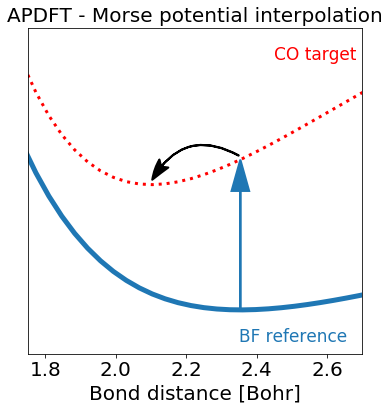

In [94]:
plt.figure(figsize=(6,6))
#plt.plot(scanpts2,np.asarray(COscan2)-min(COscan2)-.15,lw=5,color="green")
plt.plot(scanpts2,np.asarray(BFscan2)-min(BFscan2)-.35,lw=5,color="C0")

i=2

#bf->co
mi = Morse_interpolator(gpbf_co[i],hpbf_co[i+1],bf_min[0],bde["co_bf"],\
                        epbf_co[i]-min(COscan2)-.15)
plt.plot(scanpts2,mi.E(scanpts2),ls=":",lw=3,color="red")

#plt.scatter(*mi.minimum(),color="black",marker="|",linewidths=10000,s=250,lw=3)

plt.arrow(bf_min[0],-.35,0,epbf_co[i]-min(COscan2)+.2 ,length_includes_head=True,\
          color="C0",lw=2,head_width=.05,head_length=.05)

a3 = patches.FancyArrowPatch((bf_min[0], epbf_co[i]-min(COscan2)-.15+.005), 
                             (mi.minimum()[0], mi.minimum()[1]+.005),
                             connectionstyle="arc3,rad=.5",lw=2,color="black",
                             arrowstyle="fancy,head_length=20, head_width=12 ")
plt.gca().add_patch(a3)

plt.text(2.45,0.05,"CO target",size=17,color="red")
plt.text(2.35,-.4,"BF reference",size=17,color="C0")

plt.yticks([])
plt.xticks(size=20)
plt.xlabel("Bond distance [Bohr]",size=20)
plt.title("APDFT - Morse potential interpolation",size=20)
plt.xlim(1.75,2.7)
plt.ylim(-0.42,0.1)
plt.savefig("diatomics_scheme2.svg",bbox_inc="Tight")

In [19]:
mi.minimum()

(2.1006085723768595, -0.15031225707718732)

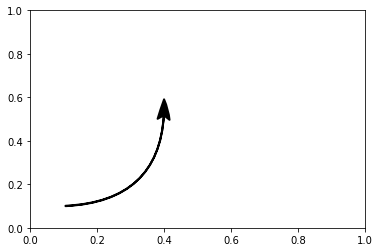

In [23]:
a3 = patches.FancyArrowPatch((0.1, 0.1), (0.4, 0.6),
                             connectionstyle="arc3,rad=.5",lw=2,
                             arrowstyle="fancy,head_length=20, head_width=12 ",color="black")
plt.gca().add_patch(a3)

In [8]:
help(patches.FancyArrowPatch)

Help on class FancyArrowPatch in module matplotlib.patches:

class FancyArrowPatch(Patch)
 |  FancyArrowPatch(posA=None, posB=None, path=None, arrowstyle='simple', arrow_transmuter=None, connectionstyle='arc3', connector=None, patchA=None, patchB=None, shrinkA=2, shrinkB=2, mutation_scale=1, mutation_aspect=None, dpi_cor=1, **kwargs)
 |  
 |  A fancy arrow patch. It draws an arrow using the :class:`ArrowStyle`.
 |  
 |  The head and tail positions are fixed at the specified start and end points
 |  of the arrow, but the size and shape (in display coordinates) of the arrow
 |  does not change when the axis is moved or zoomed.
 |  
 |  Method resolution order:
 |      FancyArrowPatch
 |      Patch
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, posA=None, posB=None, path=None, arrowstyle='simple', arrow_transmuter=None, connectionstyle='arc3', connector=None, patchA=None, patchB=None, shrinkA=2, shrinkB=2, mutation_scale=1, 